In [11]:
import sapien.core as sapien
import numpy as np
import datetime

import matplotlib.pyplot as plt
%matplotlib notebook
# from jax.config import config
# config.update("jax_debug_nans", True)

In [2]:
sim = sapien.Engine()
renderer = sapien.OptifuserRenderer()
sim.set_renderer(renderer)
render_controller = sapien.OptifuserController(renderer)

stabled = False
def create_scene(timestep, visual):
    s = sim.create_scene([0,0,0])
    s.add_ground(-1)
    s.set_timestep(timestep)

    loader = s.create_urdf_loader()
    loader.fix_root_link = True
    if visual:
        loader.collision_is_visual = True
        s.set_ambient_light([0.5, 0.5, 0.5])
        s.set_shadow_light([0, 1, -1], [0.5, 0.5, 0.5])

    # build
    robot = loader.load("../../../assets/Arm/panda.urdf")

    return s, robot

sim_timestep = 1/60
s0, robot = create_scene(sim_timestep, True)

render_controller.set_camera_position(-5, 0, 0)
render_controller.set_current_scene(s0)


In [3]:
if not stabled:
    for _ in range(3000):
        s0.step()
    stabled = True
    ini_pack = robot.pack()

In [4]:
record = np.load('record2020-04-24 00:09:50.018202.npy', allow_pickle=True).tolist()
ctrl = record['ctrl_record']
f_cost_record = np.array(record['f_cost_record'])
run_cost_record = np.array(record['run_cost_record'])
total = f_cost_record + run_cost_record

<IPython.core.display.Javascript object>


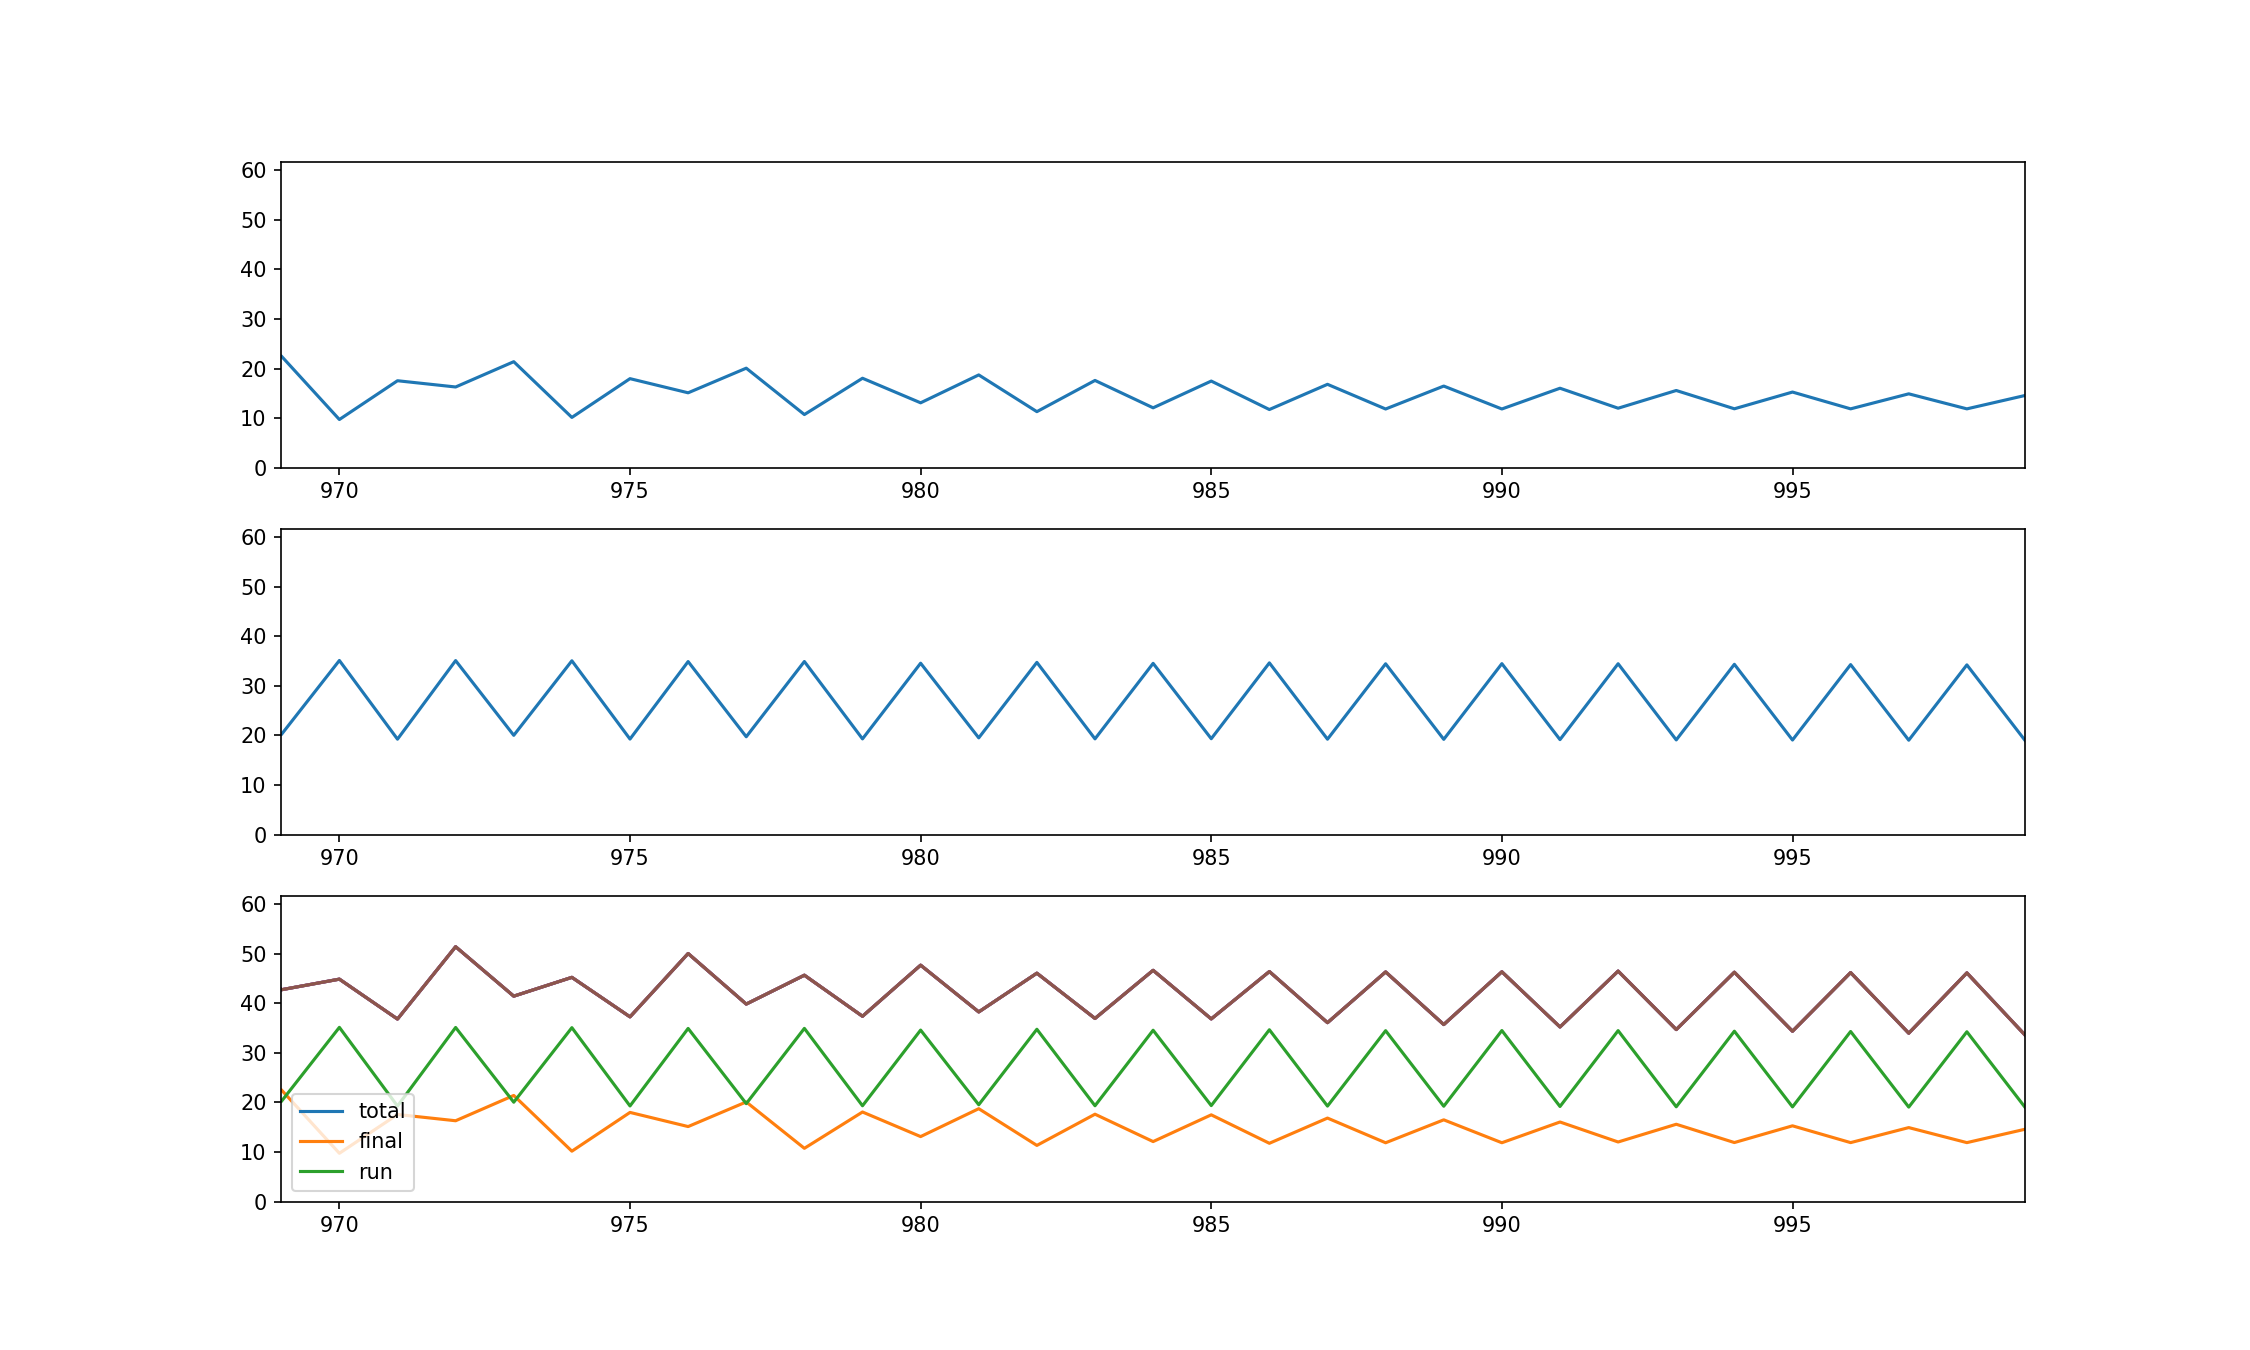

/home/zack/anaconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
/home/zack/anaconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:27: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
/home/zack/anaconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.


In [7]:
render_controller.show_window()
robot.unpack(ini_pack)

# plots
fig, axs = plt.subplots(3,figsize=(15,9))
plt.ion()

fig.show()
fig.canvas.draw()
f_ax, r_ax, t_ax = axs
PLOT_LEN = 30

for i in range(len(ctrl)):
    u = ctrl[i]
    robot.set_qf(u)
    s0.step()
    s0.update_render()
    render_controller.render()
    
    #plot
    f_ax.clear()
    r_ax.clear()
    t_ax.clear()

    x_lim = max(0, i - PLOT_LEN)
    f_ax.set_xlim(x_lim, i)
    r_ax.set_xlim(x_lim, i)
    t_ax.set_xlim(x_lim, i)

    y_lim = np.max(total[x_lim:i+1]) * 1.2
    f_ax.set_ylim(0, y_lim)
    r_ax.set_ylim(0, y_lim)
    t_ax.set_ylim(0, y_lim)


    f_ax.plot(f_cost_record)
    r_ax.plot(run_cost_record)
    
    t_ax.plot(total, label="total")
    t_ax.plot(f_cost_record, label="final")
    t_ax.plot(run_cost_record, label="run")
    t_ax.legend()


    fig.canvas.draw()
    fig.show()


<IPython.core.display.Javascript object>


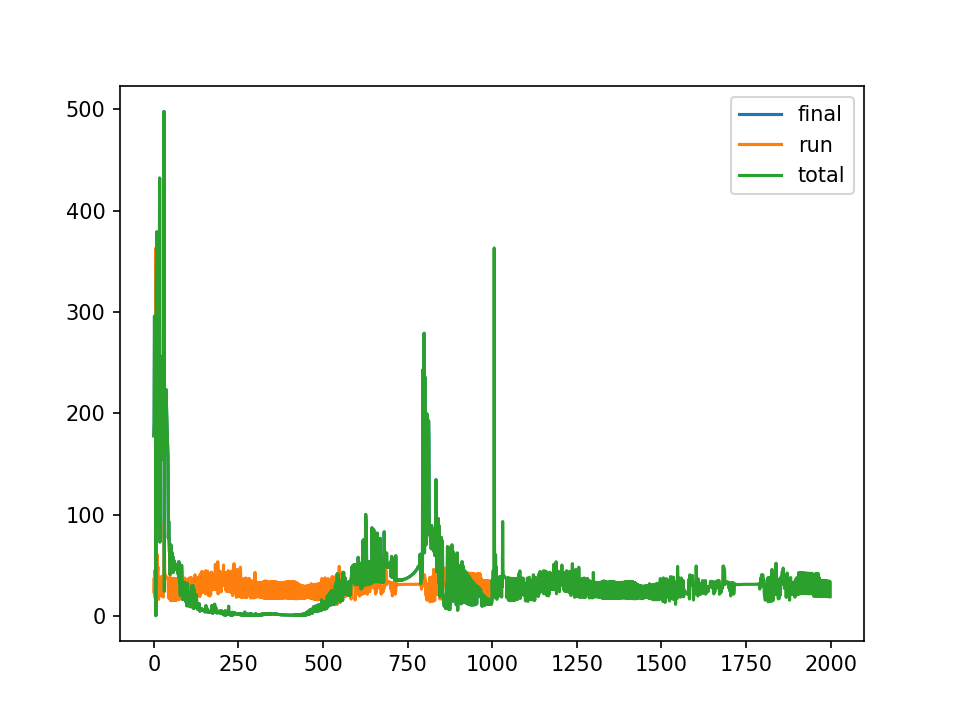

In [20]:
plt.plot(f_cost_record, label="final")
plt.plot(run_cost_record, label="run")
plt.plot(total, label="total")
plt.legend()

<IPython.core.display.Javascript object>


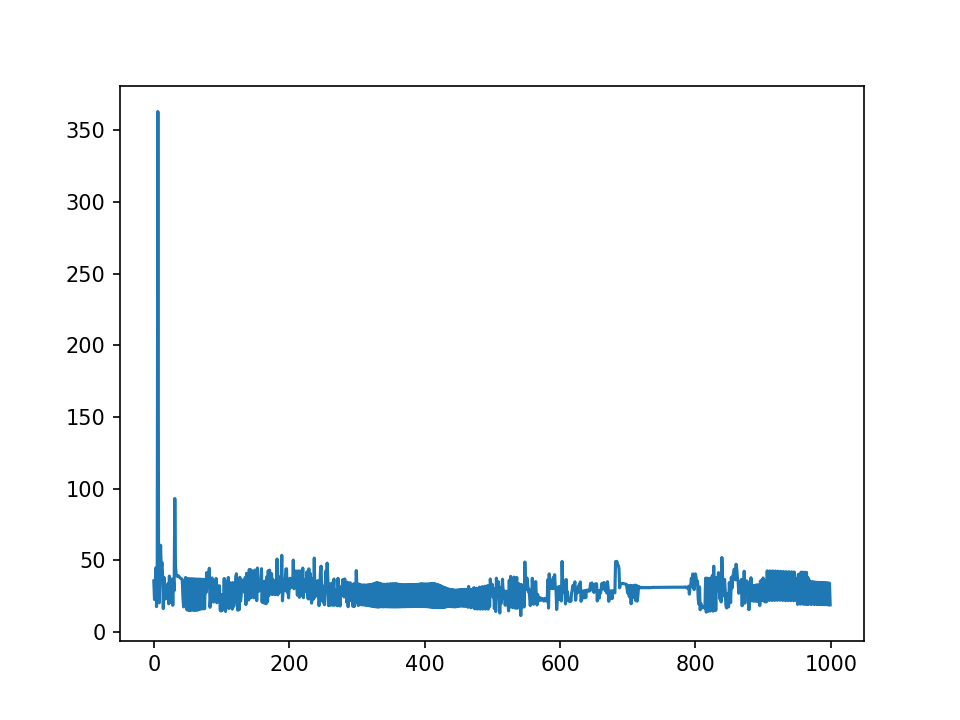

In [15]:
plt.plot(run_cost_record)
plt.show()

<IPython.core.display.Javascript object>


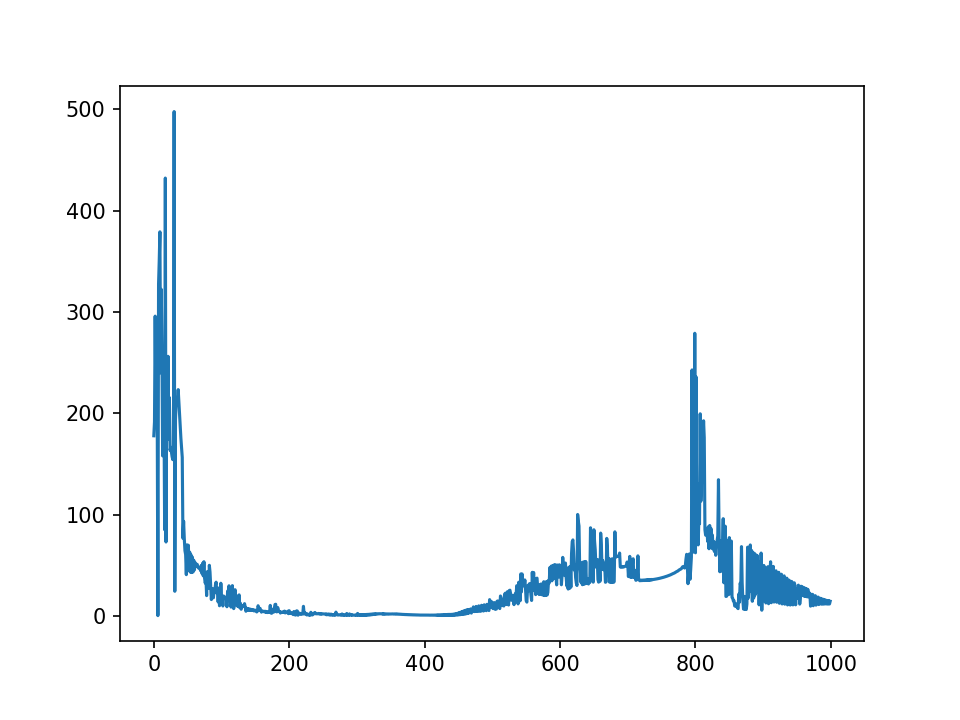

In [16]:
plt.plot(f_cost_record)
plt.show()

In [18]:
robot.get_qlimits()

array([[-2.8973,  2.8973],
       [-1.7628,  1.7628],
       [-2.8973,  2.8973],
       [-3.0718, -0.0698],
       [-2.8973,  2.8973],
       [-0.0175,  3.7525],
       [-2.8973,  2.8973],
       [ 0.    ,  0.04  ],
       [ 0.    ,  0.04  ]], dtype=float32)